# 10. 잠재성장모형

- 구조방정식모형에는 공분산 구조에 주요 관심을 두고 있으며, 특별한 경우에만 평균 구조에 관심을 두게 됨
- 평균 구조를 분석하는 대표적인 방법으로는 분산분석이 존재

<br>

**반복측정 데이터 (종단 데이터): 동일한 개체에 대하여 여러 시점에 걸쳐 반복적으로 측정된 데이터**
- 종단 데이터에 대하여 평균구조를 분석하는 기법 : 반복측정 분산분석, 위계선형모형 (HLM), 잠재성장모형(LGM)

<br>

## 10.01. 평균 변화에 대한 분석
- 잠재성장모형은 종단 데이터의 평균 구조를 분석하는데 사용하는 구조방정식모형의 특수한 형태 중 하나
- **구조방정식모형에서 잠재성장모형을 분석하기 위해서는 적어도 세 번의 시점에서 측정된 데이터가 필요**

<br>

- 300명의 청소년을 대상으로 4년에 걸쳐 매년 조사가 실시된 데이터

In [3]:
library(lavaan)
library(sem)
library(semPlot)
library(semptools)
library(psych)
library(tidyverse)

In [4]:
detach("package:sem",unload=TRUE)

Warning message:
"'sem' namespace cannot be unloaded:
  namespace 'sem' is imported by 'semPlot' so cannot be unloaded"


- **각 시점별 평균은 1.94, 2.12, 2.23, 2.48로서, 시간에 따라 평균이 상승하는 추세가 존재**

In [7]:
Cigarette <- read.csv(paste0(getwd(), "/Data/Cigarette.csv"), header = TRUE)
Cigarette.desc = describe(Cigarette %>% select(starts_with("Cigar")))

In [8]:
Cigarette.desc

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cigarette1,1,300,1.943333,0.9071191,2,1.858333,1.4826,1,5,4,0.6201947,-0.4118504,0.05237255
Cigarette2,2,300,2.123333,1.0416681,2,2.004167,1.4826,1,5,4,0.6735633,-0.2972664,0.06014074
Cigarette3,3,300,2.233333,1.0532108,2,2.125000,1.4826,1,5,4,0.6391810,-0.1563645,0.06080716
Cigarette4,4,300,2.480000,1.1665345,2,2.408333,1.4826,1,5,4,0.3504951,-0.7586898,0.06734990


<br>

- **잠재성장모형에서 평균 구조의 변화를 수식으로 표현**
    - $\mu_t$는 t시점에서의 평균, $\epsilon_t$는 오차항
    - 잠재변수 SLOPE의 경로계수를 어떻게 설정하느냐 따라 평균 변화의 형태에 대한 가정이 달라짐
    
$$\mu_t = ICEPT + b_t SLOPE + \epsilon_t$$


<br>

#### 잠재성장모형 - 평균변화
- **잠재변수 'i'는 절편향(ICEPT), 's'는 기울기 (SLOPE)**

<br>

- 아래 결과와 같이, $b_1=0, b_2 = 1, b_3 = 2, b_4 = 3$으로 설정 

    $\rightarrow$ 첫 번째 시점의 평균은 $\hat{\mu}_1 = ICEPT$이고, 두 번째 시점부터 SLOPE의 크기만큼 매번 평균이 증가한다고 가정

<br>

- 만약 $b_1 = 0, b_2 = 1, b_3 = 1, b_4 = 1$로 설정

    $\rightarrow$ 두 번째 시점에서 평균이 SLOPE 크기만큼 증가하고, 세 번째와 네 번째 시점의 평균은 두 번째 시점과 동일하다고 가정

In [11]:
Cigarette.A <- "
    i =~ 1 * Cigarette1 + 1 * Cigarette2 + 1 * Cigarette3 + 1 * Cigarette4
    s =~ 0 * Cigarette1 + 1 * Cigarette2 + 2 * Cigarette3 + 3 * Cigarette4
"

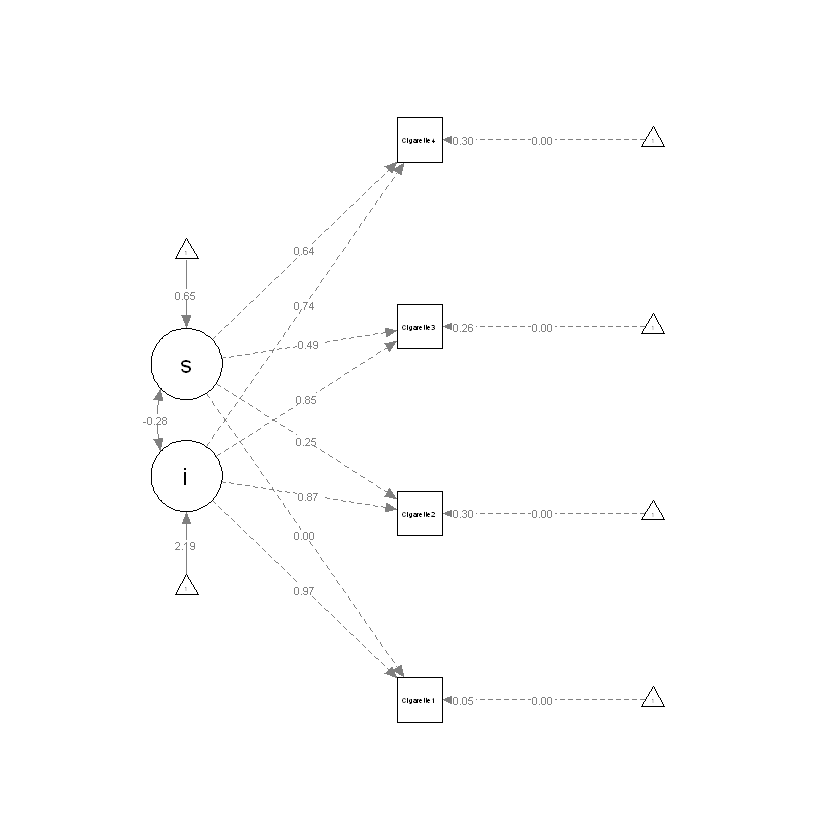

In [13]:
Cigarette.A.fit <- growth(Cigarette.A, data = Cigarette)
semPaths(Cigarette.A.fit, whatLabels = "std", style = "lisrel", rotation = 2, nCharNodes = 0)

- 적합도 출력 : 대부분의 적합도 지수들이 우수

In [16]:
library(tidymodels)

In [17]:
tidy(fitMeasures(Cigarette.A.fit)) %>%
    filter(names %in% c("chisq", "df", "gfi", "agfi", "cfi", "tli", "rmsea", "srmr"))

Warning message:
"'tidy.numeric' is deprecated.
See help("Deprecated")"


names,x
<chr>,<lvn.vctr>
chisq,7.50167781
df,5.00000000
cfi,0.99664948
tli,0.99597938
rmsea,0.04083853
srmr,0.03217576
gfi,0.99687882
agfi,0.99126068


- 계수 추정치
    - 첫 번째 시점에서 흡연수준의 평균은 1.942이고, 매 시점에서 0.167정도 흡연수준이 증가

$$\begin{cases}
\hat{\mu_1} = 1.942 + 0 \times 0.167 = 1.942\\
\hat{\mu_2} = 1.942 + 1 \times 0.167 = 2.109\\
\hat{\mu_3} = 1.942 + 2 \times 0.167 = 2.273\\
\hat{\mu_4} = 1.942 + 3 \times 0.167 = 2.443\\
\end{cases}$$

In [21]:
summary(Cigarette.A.fit, fit.measures = TRUE, rsquare = TRUE, standardized = TRUE)$pe %>%
    filter(op == "=~") %>% select(lhs, op, rhs, est)

lhs,op,rhs,est
<chr>,<chr>,<chr>,<dbl>
i,=~,Cigarette1,1
i,=~,Cigarette2,1
i,=~,Cigarette3,1
i,=~,Cigarette4,1
s,=~,Cigarette1,0
s,=~,Cigarette2,1
s,=~,Cigarette3,2
s,=~,Cigarette4,3


- 또한 절편향 ICEPT와 기울기 SLOPE 사이의 공분산이 통계적으로 유의하며, 상관계수가 -0.276으로 추정
    - 초기 시점의 평균이 크면 기울기가 작아지는 관계가 있음을 나타냄

In [25]:
summary(Cigarette.A.fit, fit.measures = TRUE, rsquare = TRUE, standardized = TRUE)$pe %>%
    filter(op == "~~") %>% select(lhs, op, rhs, est, std.all, pvalue) %>% filter(lhs == "i", rhs == "s")

lhs,op,rhs,est,std.all,pvalue
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
i,~~,s,-0.06234184,-0.2755999,0.004768809


- 오차변수들의 분산이 모두 다르게 추정되어 있으며, 네 번째 시점의 오차 분산이 가장 큼

In [27]:
summary(Cigarette.A.fit, fit.measures = TRUE, rsquare = TRUE, standardized = TRUE)$pe %>%
    filter(op == "~~") %>% select(lhs, op, rhs, est, std.all, pvalue) %>% filter(str_detect(lhs, "Cigar"))

lhs,op,rhs,est,std.all,pvalue
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
Cigarette1,~~,Cigarette1,0.04238704,0.05130151,2.132979e-01
Cigarette2,~~,Cigarette2,0.30477879,0.29612588,0.000000e+00
Cigarette3,~~,Cigarette3,0.27796969,0.25892256,0.000000e+00
Cigarette4,~~,Cigarette4,0.42369981,0.29816979,3.198775e-12


<br>

## 10.02. 공변량의 효과에 대한 분석

In [28]:
Cigarette.B <- "
    # Intercept and Slope
    i =~ 1 * Cigarette1 + 1 * Cigarette2 + 1 * Cigarette3 + 1 * Cigarette4
    s =~ 0 * Cigarette1 + 1 * Cigarette2 + 2 * Cigarette3 + 3 * Cigarette4

    # regression
    i ~ Gender + Family
    s ~ Gender + Family
"

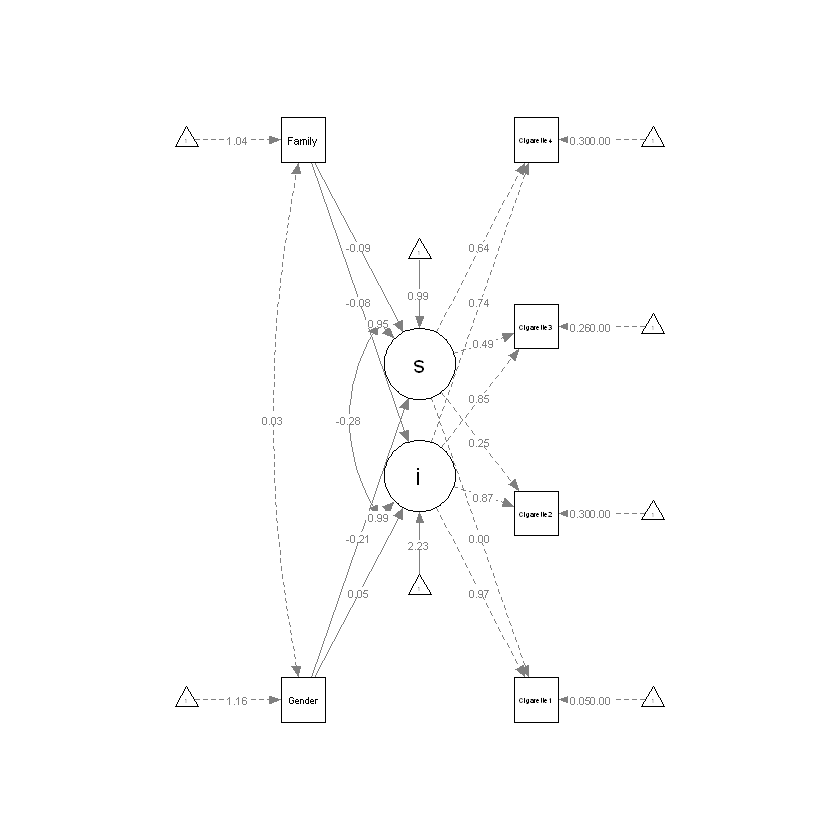

In [29]:
Cigarette.B.fit <- growth(Cigarette.B, data = Cigarette)
semPaths(Cigarette.B.fit, whatLabels = "std", style = "lisrel", rotation = 2, nCharNodes = 0)

- 대부분의 적합도 지수들이 우수

In [30]:
tidy(fitMeasures(Cigarette.B.fit)) %>%
    filter(names %in% c("chisq", "df", "gfi", "agfi", "cfi", "tli", "rmsea", "srmr"))

Warning message:
"'tidy.numeric' is deprecated.
See help("Deprecated")"


names,x
<chr>,<lvn.vctr>
chisq,11.02212947
df,9.00000000
cfi,0.99732595
tli,0.99584037
rmsea,0.02736671
srmr,0.02610877
gfi,0.99547175
agfi,0.98641525


- 경로 'SLOPE $\leftarrow$ Gender'에 대한 추정치는 통계적으로 유의
- 경로 'ICEPT $\leftarrow$ Gender'에 대한 추정치는 통계적으로 유의하지 않음

#### $\rightarrow$ 성별에 따른 흡연수준의 평균은 차이가 없으나, 시점이 지나면서 평균의 변화량은 성별에 따라 달라짐을 의미
**즉, 여자의 경우 (Gender = 1)가 남자의 경우 (Gender = 0)에 비하여 기울기의 크기가 더 작다**

<br>

- 경로 'SLOPE $\leftarrow$ Family'에 대한 추정치는 통계적으로 유의하지 않음

**가족특성에 따른 초기 시점의 평균과 기울기의 변화에 모두 차이가 없음**

In [36]:
summary(Cigarette.B.fit, fit.measures = TRUE, rsquare = TRUE, standardized = TRUE)$pe %>%
    filter(op == "~") %>% select(lhs, op, rhs, est, std.all, pvalue)

lhs,op,rhs,est,std.all,pvalue
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
i,~,Gender,0.08477937,0.04739435,0.422063634
i,~,Family,-0.14557778,-0.08220645,0.163755117
s,~,Gender,-0.10689904,-0.20741104,0.003088764
s,~,Family,-0.04776792,-0.09362001,0.181709622
